<a href="https://colab.research.google.com/github/Cylia-845/Exercice2_Data_Mining/blob/main/Choix_de_la_zone_g%C3%A9ographie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choix de la zone géographique


Code pour vérifier les valeurs manquantes

In [ ]:
import pandas as pd

# Charger les fichiers
file_t1 = "resultats-par-niveau-dpt-t1-france-entiere.xlsx"
file_t2 = "resultats-par-niveau-dpt-t2-france-entiere.xlsx"

df_t1 = pd.read_excel(file_t1)
df_t2 = pd.read_excel(file_t2)

def verifier_valeurs_manquantes(df, fichier_nom):
    print(f"\nVérification des valeurs manquantes pour {fichier_nom} :")

    # Vérifier les valeurs manquantes
    valeurs_manquantes = df.isnull().sum()
    total_manquants = valeurs_manquantes.sum()

    if total_manquants == 0:
        print("✅ Aucune valeur manquante détectée.")
    else:
        print(f"⚠️ {total_manquants} valeurs manquantes détectées.")
        print("Colonnes concernées et nombre de valeurs manquantes :")
        print(valeurs_manquantes[valeurs_manquantes > 0])

# Appliquer la vérification sur chaque fichier
verifier_valeurs_manquantes(df_t1, file_t1)
verifier_valeurs_manquantes(df_t2, file_t2)



Vérification des valeurs manquantes pour resultats-par-niveau-dpt-t1-france-entiere.xlsx :
✅ Aucune valeur manquante détectée.

Vérification des valeurs manquantes pour resultats-par-niveau-dpt-t2-france-entiere.xlsx :
✅ Aucune valeur manquante détectée.


Code pour détecter les doublons

In [ ]:
# Trouver les lignes en double basées sur toutes les colonnes
doublons_t1 = df_t1[df_t1.duplicated(keep=False)]  # Affiche toutes les occurrences des doublons
doublons_t2 = df_t2[df_t2.duplicated(keep=False)]  # Affiche toutes les occurrences des doublons

# Afficher les doublons
print(doublons_t1)
print(doublons_t2)


Empty DataFrame
Columns: [Code du département, Libellé du département, Etat saisie, Inscrits, Abstentions, % Abs/Ins, Votants, % Vot/Ins, Blancs, % Blancs/Ins, % Blancs/Vot, Nuls, % Nuls/Ins, % Nuls/Vot, Exprimés, % Exp/Ins, % Exp/Vot, Sexe, Nom, Prénom, Voix, % Voix/Ins, % Voix/Exp, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unnamed: 72, Unnamed: 73, Unnamed: 74, Unnamed: 75, Unnamed: 76, Unnamed: 77, 

Code pour normaliser les colonnes numériques


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = df_t1.select_dtypes(include=['number']).columns
colonnes_numeriques_2 = df_t2.select_dtypes(include=['number']).columns


# Initialiser le scaler
scaler = MinMaxScaler()

# Appliquer la normalisation aux colonnes numériques des deux fichiers
df_t1[colonnes_numeriques] = scaler.fit_transform(df_t1[colonnes_numeriques])
df_t2[colonnes_numeriques_2] = scaler.fit_transform(df_t2[colonnes_numeriques_2])

# Afficher un aperçu des données normalisées
print(df_t1.head())
print(df_t2.head())

  Code du département   Libellé du département Etat saisie  Inscrits  \
0                  01                      Ain     Complet  0.239413   
1                  02                    Aisne     Complet  0.203719   
2                  03                   Allier     Complet  0.135414   
3                  04  Alpes-de-Haute-Provence     Complet  0.068015   
4                  05             Hautes-Alpes     Complet  0.059968   

   Abstentions  % Abs/Ins   Votants  % Vot/Ins    Blancs  % Blancs/Ins  ...  \
0     0.102530   0.061474  0.260423   0.938526  0.322848      0.758865  ...   
1     0.106348   0.157589  0.207911   0.842411  0.215078      0.560284  ...   
2     0.060510   0.084301  0.145495   0.915699  0.214043      0.907801  ...   
3     0.029077   0.073688  0.074021   0.926312  0.083444      0.659574  ...   
4     0.024844   0.063076  0.065831   0.936924  0.078670      0.716312  ...   

   Unnamed: 79  Unnamed: 80  Unnamed: 81  Unnamed: 82  Unnamed: 83  \
0     Philippe     0.2

Code pour remplir les noms des colonnes manquants

In [ ]:
# Fonction pour modifier les noms des colonnes des candidats
def modifier_fichier(input_file, output_file, start_col_for_prefixes, num_candidats, num_prefix):
    # Charger le fichier Excel
    df = pd.read_excel(input_file, header=0)

    # Liste des noms de colonnes à assigner
    colonnes = ["Sexe", "Nom", "Prénom", "Voix", "% Voix/Ins", "% Voix/Exp"]

    # Indice de départ pour la colonne X (pour les noms de colonnes vides)
    start_col = 23  # Colonne X est l'indice 23 en Python (0-indexé)

    # Vérification et remplissage des cellules vides dans la première ligne
    col_index = start_col  # Commencer à partir de la colonne X (index 23)
    for i in range(num_candidats):  # Utiliser num_candidats pour s'assurer qu'on n'itère pas trop
        for j, col_name in enumerate(colonnes):
            if pd.isna(df.iloc[0, col_index]):  # Vérifier si la cellule de la première ligne est vide
                # Si la cellule est vide, on remplace le nom de la colonne
                df.columns.values[col_index] = col_name
            col_index += 1

    # Ajouter des préfixes pour chaque candidat
    col_index = start_col_for_prefixes # Repartir de la colonne spécifiée
    for i in range(num_prefix):  # Utiliser num_candidats pour chaque fichier
        for j, col_name in enumerate(colonnes):
            # Ajouter un préfixe C1, C2, ... jusqu'à C12 pour chaque colonne
            new_col_name = f"C{i+1}.{col_name}"
            df.columns.values[col_index] = new_col_name
            col_index += 1

    # Sauvegarder le fichier modifié avec les préfixes ajoutés
    df.to_excel(output_file, index=False)

    print(f"Les cellules vides ont été remplies et les préfixes ont été ajoutés avec succès pour {input_file}.")

# Traitement du premier fichier (1 er tour)
modifier_fichier("/content/resultats-par-niveau-dpt-t1-france-entiere.xlsx",
                 "resultats-par-niveau-dpt-t1-france-entiere_modifié.xlsx",
                 start_col_for_prefixes=17,
                 num_candidats=11, num_prefix=12)

# Traitement du deuxième fichier (2 ème tour)
modifier_fichier("/content/resultats-par-niveau-dpt-t2-france-entiere.xlsx",
                 "resultats-par-niveau-dpt-t2-france-entiere_modifié.xlsx",
                 start_col_for_prefixes=17,
                 num_candidats=1, num_prefix=2)


Les cellules vides ont été remplies et les préfixes ont été ajoutés avec succès pour /content/resultats-par-niveau-dpt-t1-france-entiere.xlsx.
Les cellules vides ont été remplies et les préfixes ont été ajoutés avec succès pour /content/resultats-par-niveau-dpt-t2-france-entiere.xlsx.


 Heatmaps des
corrélations entre les variables

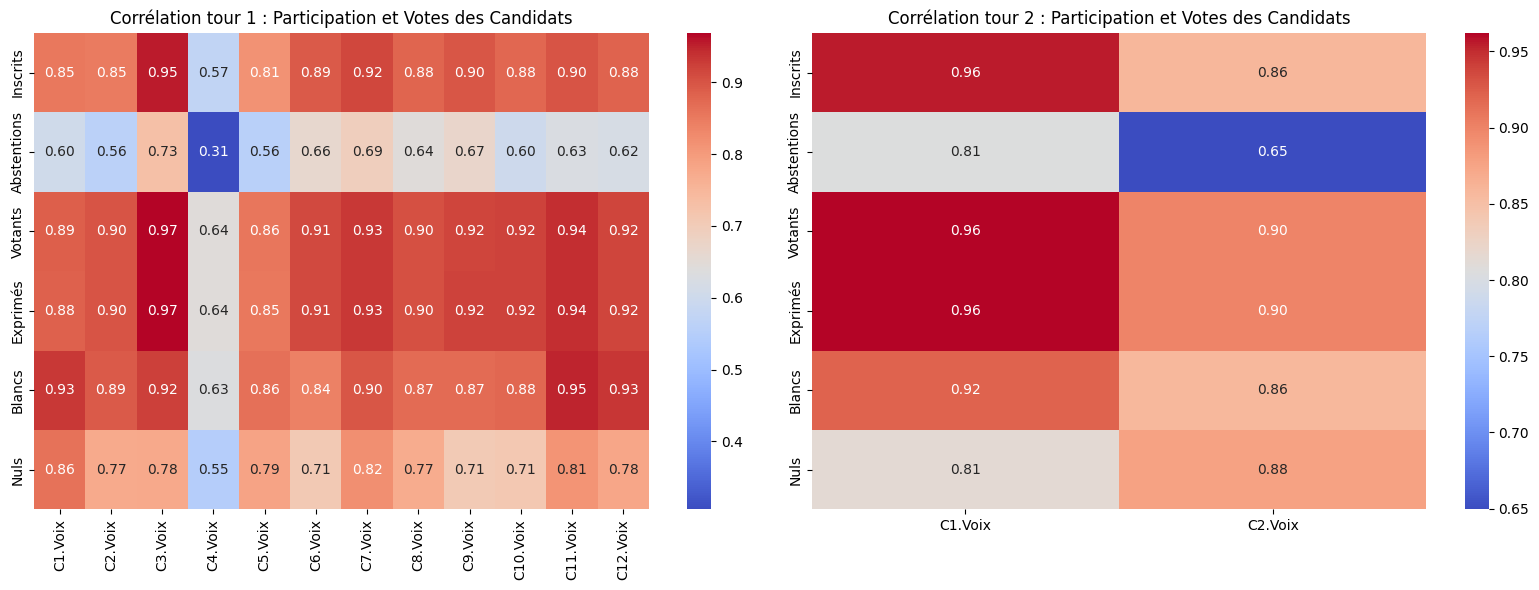

In [ ]:
# Filtrer les colonnes numériques pour les deux DataFrames
# Participation et nombre de voix reçues par candidat
numeric_df_1 = df_t1.select_dtypes(include=['float64', 'int64'])
numeric_df_2 = df_t2.select_dtypes(include=['float64', 'int64'])

# Prendre un échantillon de 100 lignes aléatoires pour chaque DataFrame
df_sample_1 = numeric_df_1.sample(n=100, random_state=42)
df_sample_2 = numeric_df_2.sample(n=100, random_state=42)

# Sélectionner les variables pour les axes X
cols_x = ['Inscrits', 'Abstentions', 'Votants', 'Exprimés', 'Blancs', 'Nuls']

# Sélectionner les variables pour les axes Y pour les deux DataFrames
cols_y_1 = ['C1.Voix', 'C2.Voix', 'C3.Voix', 'C4.Voix', 'C5.Voix', 'C6.Voix', 'C7.Voix', 'C8.Voix', 'C9.Voix', 'C10.Voix', 'C11.Voix', 'C12.Voix']  # df_t1
cols_y_2 = ['C1.Voix', 'C2.Voix']  # df_t2

# Créer une sous-matrice de corrélation pour chaque DataFrame
correlation_matrix_1 = df_sample_1[cols_x + cols_y_1].corr().loc[cols_x, cols_y_1]
correlation_matrix_2 = df_sample_2[cols_x + cols_y_2].corr().loc[cols_x, cols_y_2]

# Créer un subplot avec 2 axes alignés horizontalement
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 ligne, 2 colonnes

# Heatmap pour df_t1 avec 12 colonnes
sns.heatmap(correlation_matrix_1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Corrélation tour 1 : Participation et Votes des Candidats")

# Heatmap pour df_t2 avec 2 colonnes
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Corrélation tour 2 : Participation et Votes des Candidats")

# Ajuster l'espacement pour que tout soit bien visible
plt.tight_layout()
plt.show()


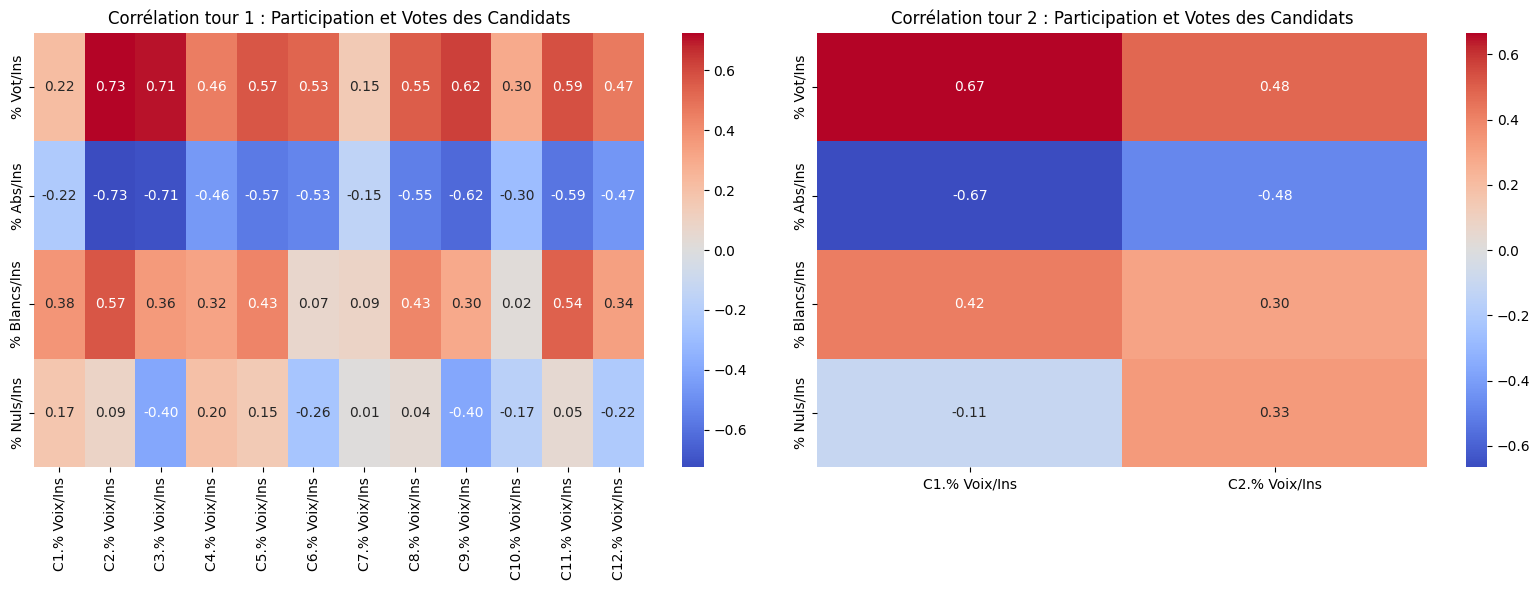

In [ ]:
#Corrélation entre taux de participation et résultats des candidats
# Filtrer les colonnes numériques pour les deux DataFrames
numeric_df_1 = df_t1.select_dtypes(include=['float64', 'int64'])
numeric_df_2 = df_t2.select_dtypes(include=['float64', 'int64'])

# Prendre un échantillon de 100 lignes aléatoires pour chaque DataFrame
df_sample_1 = numeric_df_1.sample(n=100, random_state=42)
df_sample_2 = numeric_df_2.sample(n=100, random_state=42)

# Filtrer les colonnes numériques pour les deux DataFrames
numeric_df_1 = df_t1.select_dtypes(include=['float64', 'int64'])
numeric_df_2 = df_t2.select_dtypes(include=['float64', 'int64'])

# Prendre un échantillon de 100 lignes aléatoires pour chaque DataFrame
df_sample_1 = numeric_df_1.sample(n=100, random_state=42)
df_sample_2 = numeric_df_2.sample(n=100, random_state=42)

# Sélectionner les variables pour les axes X
cols_x = ['% Vot/Ins', '% Abs/Ins', '% Blancs/Ins', '% Nuls/Ins']

# Sélectionner les variables pour les axes Y pour les deux DataFrames
cols_y_1 = ['C1.% Voix/Ins', 'C2.% Voix/Ins', 'C3.% Voix/Ins', 'C4.% Voix/Ins', 'C5.% Voix/Ins', 'C6.% Voix/Ins', 'C7.% Voix/Ins', 'C8.% Voix/Ins', 'C9.% Voix/Ins', 'C10.% Voix/Ins', 'C11.% Voix/Ins', 'C12.% Voix/Ins']
  # df_t1
cols_y_2 = ['C1.% Voix/Ins', 'C2.% Voix/Ins']  # df_t2

# Créer une sous-matrice de corrélation pour chaque DataFrame
correlation_matrix_1 = df_sample_1[cols_x + cols_y_1].corr().loc[cols_x, cols_y_1]
correlation_matrix_2 = df_sample_2[cols_x + cols_y_2].corr().loc[cols_x, cols_y_2]

# Créer un subplot avec 2 axes alignés horizontalement
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 ligne, 2 colonnes

# Heatmap pour df_t1 avec 12 colonnes
sns.heatmap(correlation_matrix_1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Corrélation tour 1 : Taux de participation vs. résultats des candidats")

# Heatmap pour df_t2 avec 2 colonnes
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Corrélation tour 2 : Taux de participation vs. résultats des candidats")

# Ajuster l'espacement pour que tout soit bien visible
plt.tight_layout()
plt.show()

Tests de différents critères pour le choix de la zone (Participation élevée)

<ipython-input-64-dc395930fdb0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_sorted.head(5), x="% Vot/Ins", y="Libellé du département", palette="Blues_d")


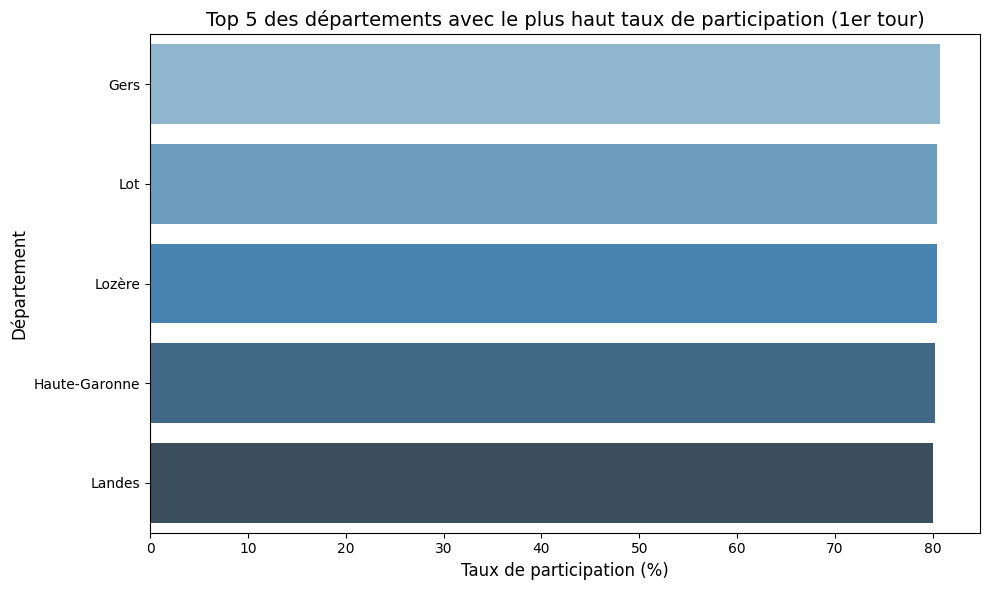

<ipython-input-64-dc395930fdb0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_sorted.head(5), x="% Vot/Ins", y="Libellé du département", palette="Greens_d")


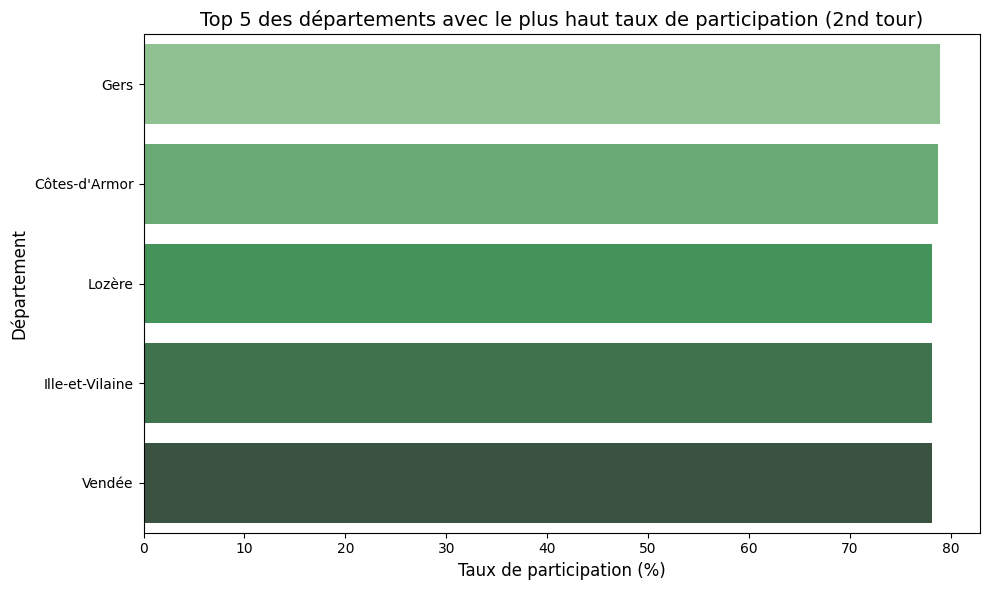

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les deux fichiers (premier et second tours)
file_t1 = "resultats-par-niveau-dpt-t1-france-entiere_modifié.xlsx"
file_t2 = "resultats-par-niveau-dpt-t2-france-entiere_modifié.xlsx"

# Charger les données des deux tours
df_t1 = pd.read_excel(file_t1)
df_t2 = pd.read_excel(file_t2)

# Trier les données par taux de participation (% Vot/Ins) en ordre décroissant
df_t1_sorted = df_t1.sort_values(by="% Vot/Ins", ascending=False)
df_t2_sorted = df_t2.sort_values(by="% Vot/Ins", ascending=False)

# Graphique pour le premier tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t1_sorted.head(5), x="% Vot/Ins", y="Libellé du département", palette="Blues_d")
plt.title("Top 5 des départements avec le plus haut taux de participation (1er tour)", fontsize=14)
plt.xlabel("Taux de participation (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()

# Graphique pour le second tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t2_sorted.head(5), x="% Vot/Ins", y="Libellé du département", palette="Greens_d")
plt.title("Top 5 des départements avec le plus haut taux de participation (2nd tour)", fontsize=14)
plt.xlabel("Taux de participation (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-65-db2c70447a64>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_sorted.head(5), x="% Exp/Vot", y="Libellé du département", palette="Blues_d")


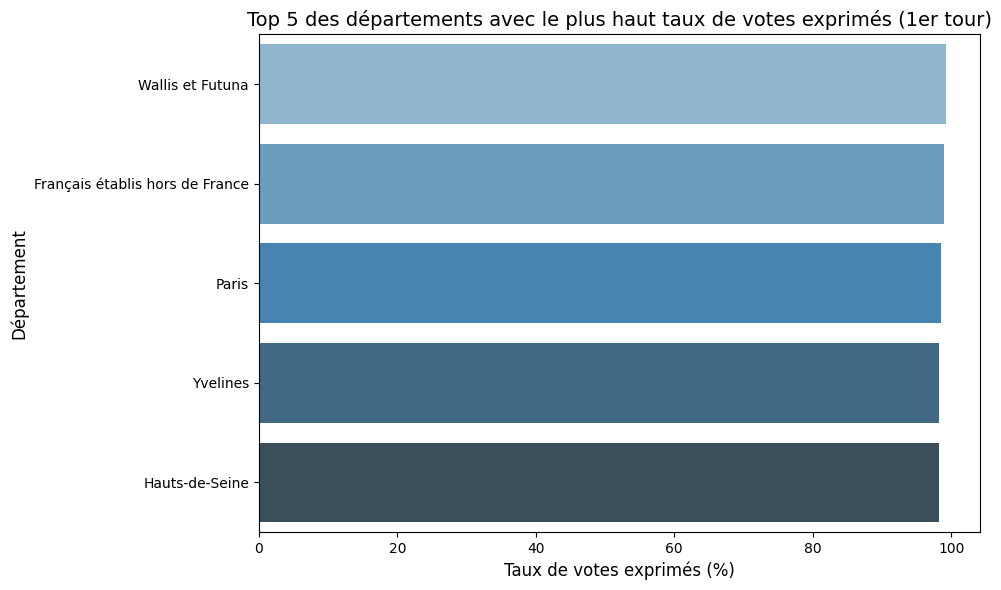

<ipython-input-65-db2c70447a64>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_sorted.head(5), x="% Exp/Vot", y="Libellé du département", palette="Greens_d")


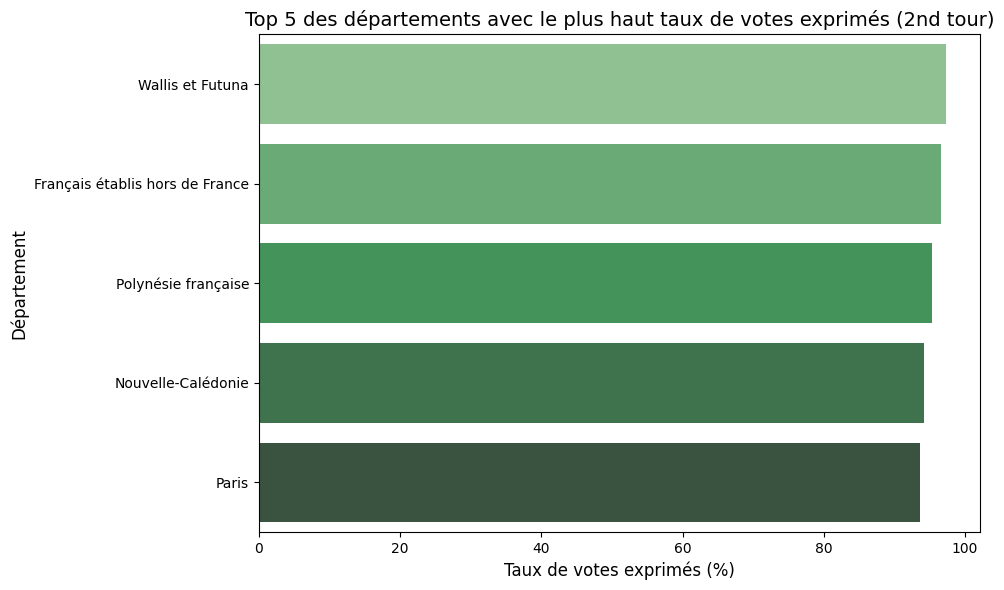

In [ ]:
# Trier les données par taux de votes exprimés (% Exp/Vot) en ordre décroissant
df_t1_sorted = df_t1.sort_values(by="% Exp/Vot", ascending=False)
df_t2_sorted = df_t2.sort_values(by="% Exp/Vot", ascending=False)

# Graphique pour le premier tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t1_sorted.head(5), x="% Exp/Vot", y="Libellé du département", palette="Blues_d")
plt.title("Top 5 des départements avec le plus haut taux de votes exprimés (1er tour)", fontsize=14)
plt.xlabel("Taux de votes exprimés (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()

# Graphique pour le second tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t2_sorted.head(5), x="% Exp/Vot", y="Libellé du département", palette="Greens_d")
plt.title("Top 5 des départements avec le plus haut taux de votes exprimés (2nd tour)", fontsize=14)
plt.xlabel("Taux de votes exprimés (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-66-041d50fc8e38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_sorted.head(5), x="% Exp/Ins", y="Libellé du département", palette="Blues_d")


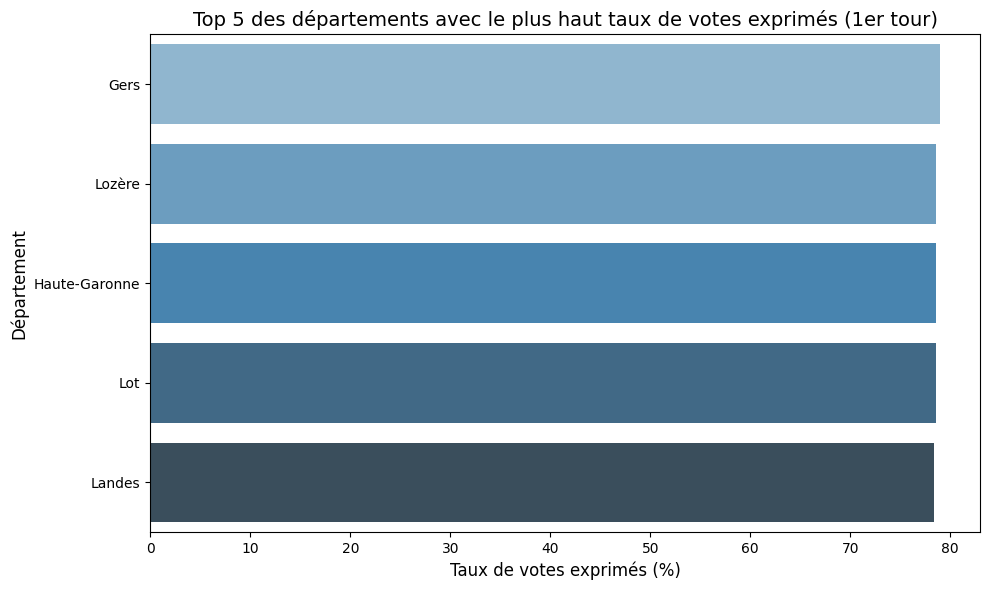

<ipython-input-66-041d50fc8e38>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_sorted.head(5), x="% Exp/Ins", y="Libellé du département", palette="Greens_d")


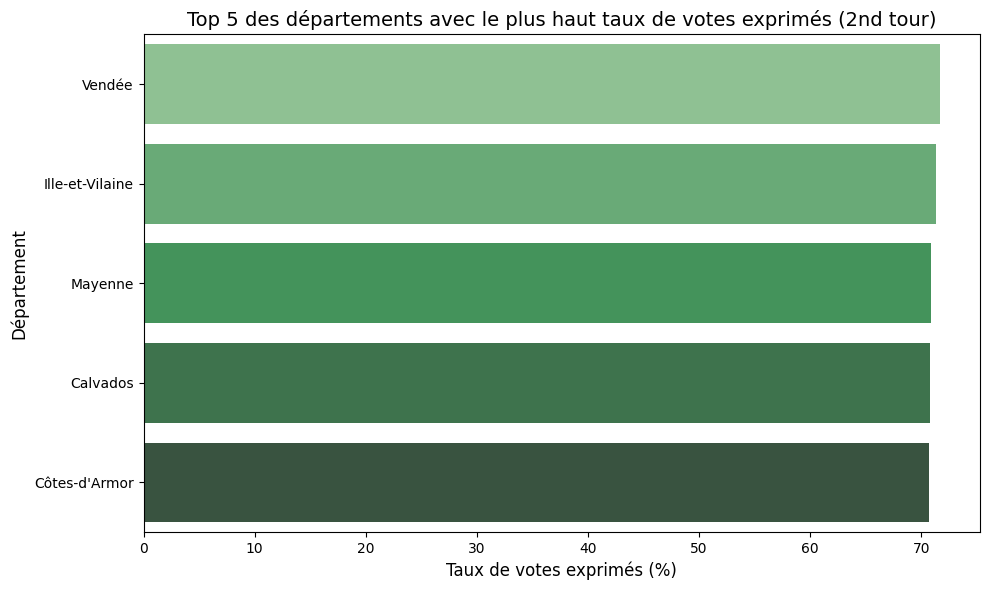

In [ ]:
# Trier les données par taux de votes exprimés (% Exp/Ins) en ordre décroissant
df_t1_sorted = df_t1.sort_values(by="% Exp/Ins", ascending=False)
df_t2_sorted = df_t2.sort_values(by="% Exp/Ins", ascending=False)

# Graphique pour le premier tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t1_sorted.head(5), x="% Exp/Ins", y="Libellé du département", palette="Blues_d")
plt.title("Top 5 des départements avec le plus haut taux de votes exprimés (1er tour)", fontsize=14)
plt.xlabel("Taux de votes exprimés (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()

# Graphique pour le second tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t2_sorted.head(5), x="% Exp/Ins", y="Libellé du département", palette="Greens_d")
plt.title("Top 5 des départements avec le plus haut taux de votes exprimés (2nd tour)", fontsize=14)
plt.xlabel("Taux de votes exprimés (%)", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-67-db89aa817de0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_grouped.head(5), x="Exprimés", y="Libellé du département", palette="Blues_d")


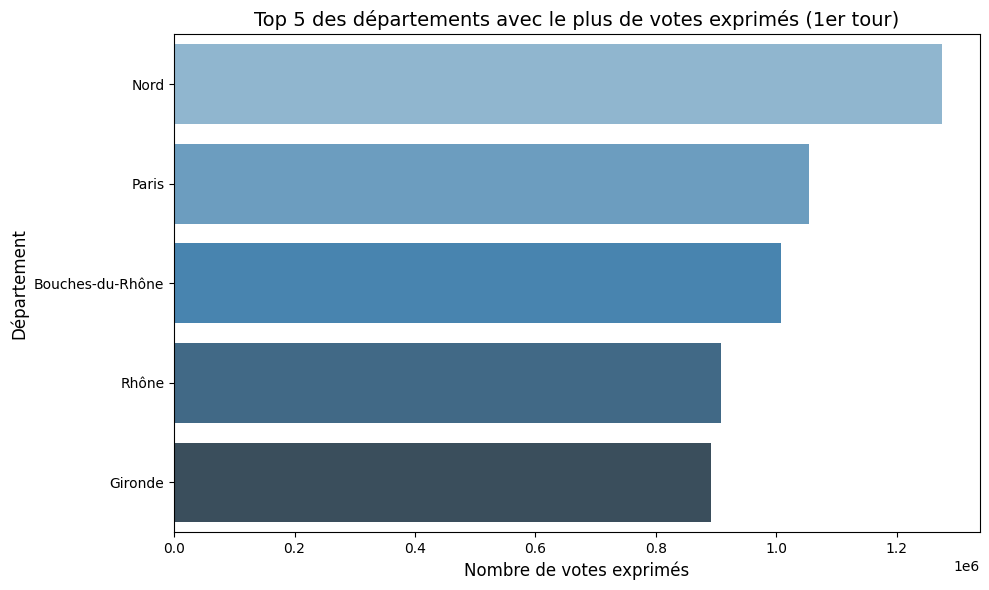

<ipython-input-67-db89aa817de0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_grouped.head(5), x="Exprimés", y="Libellé du département", palette="Greens_d")


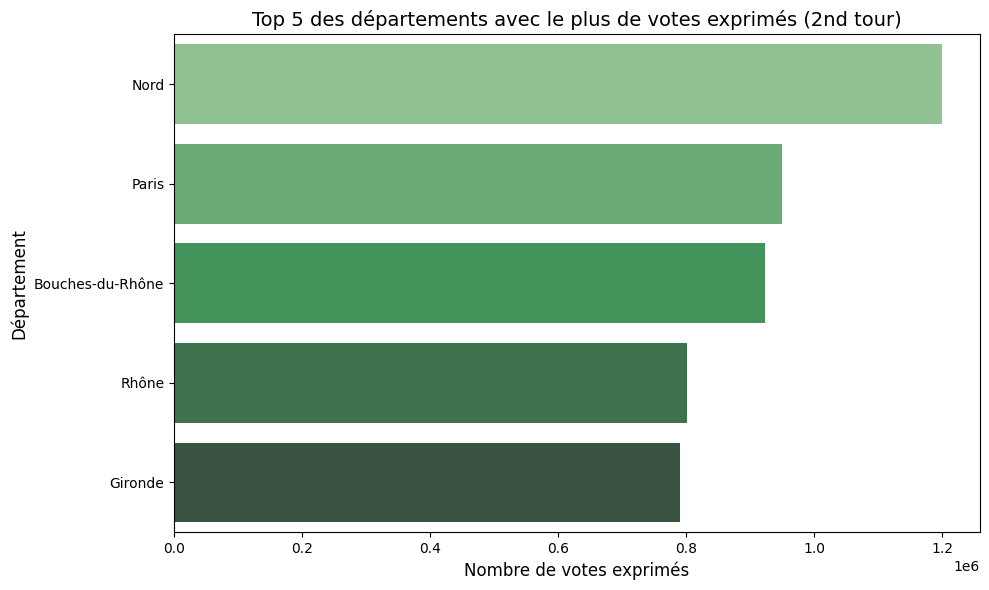

In [ ]:
# Trier les données par votes exprimés (ordre décroissant)
df_t1_grouped = df_t1.sort_values(by="Exprimés", ascending=False)
df_t2_grouped = df_t2.sort_values(by="Exprimés", ascending=False)

# Graphique pour le premier tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t1_grouped.head(5), x="Exprimés", y="Libellé du département", palette="Blues_d")
plt.title("Top 5 des départements avec le plus de votes exprimés (1er tour)", fontsize=14)
plt.xlabel("Nombre de votes exprimés", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()

# Graphique pour le second tour
plt.figure(figsize=(10, 6))
sns.barplot(data=df_t2_grouped.head(5), x="Exprimés", y="Libellé du département", palette="Greens_d")
plt.title("Top 5 des départements avec le plus de votes exprimés (2nd tour)", fontsize=14)
plt.xlabel("Nombre de votes exprimés", fontsize=12)
plt.ylabel("Département", fontsize=12)
plt.tight_layout()
plt.show()


Nous avons choisi d'utiliser le critère des **votes exprimés (Exprimés)** car il offre une mesure absolue, permettant de mieux différencier les départements en termes de participation, contrairement aux pourcentages qui peuvent être similaires dans plusieurs départements.

Visualisations du nombre de voix obtenus par candidat dans chaque département de la liste des Top 5 départements avec le plus de votes valides

<ipython-input-68-07f816f6009f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")


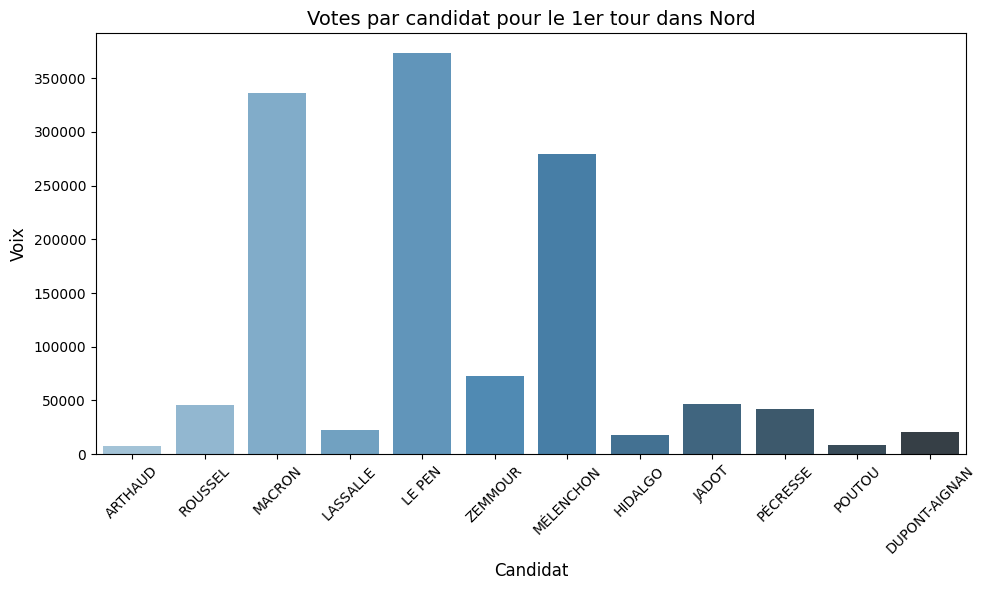

<ipython-input-68-07f816f6009f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")


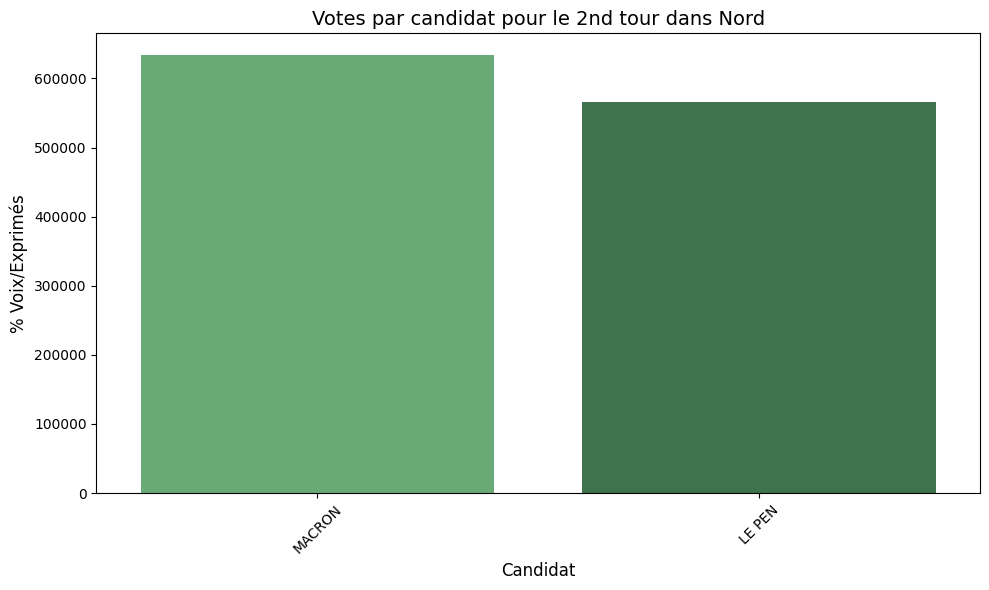

<ipython-input-68-07f816f6009f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")


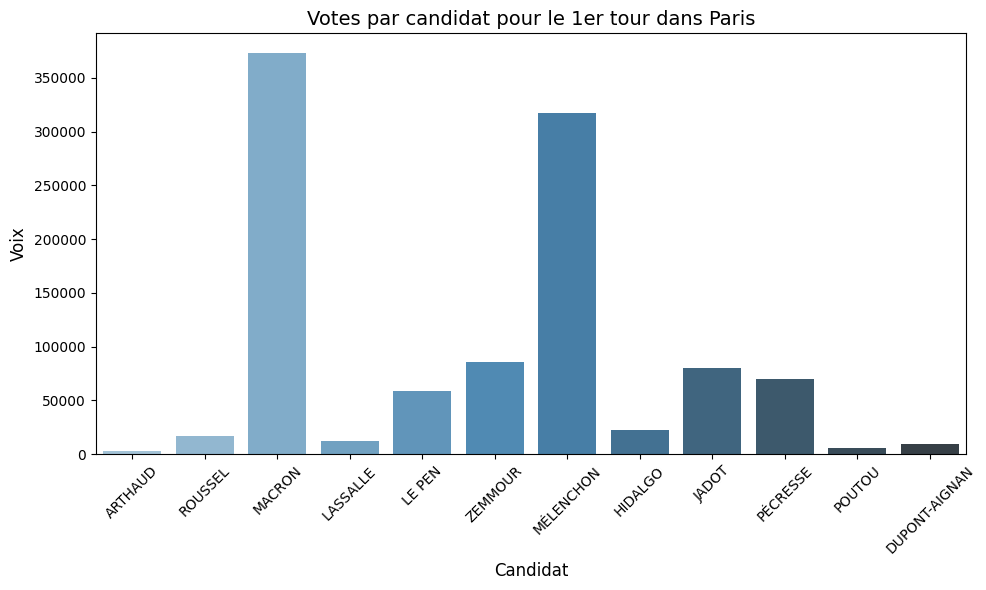

<ipython-input-68-07f816f6009f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")


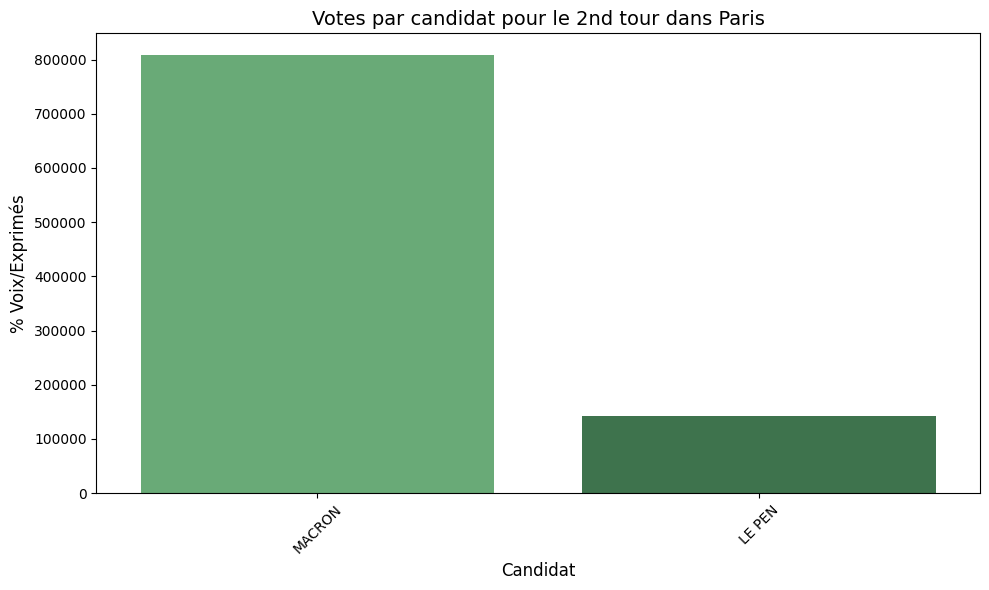

<ipython-input-68-07f816f6009f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")


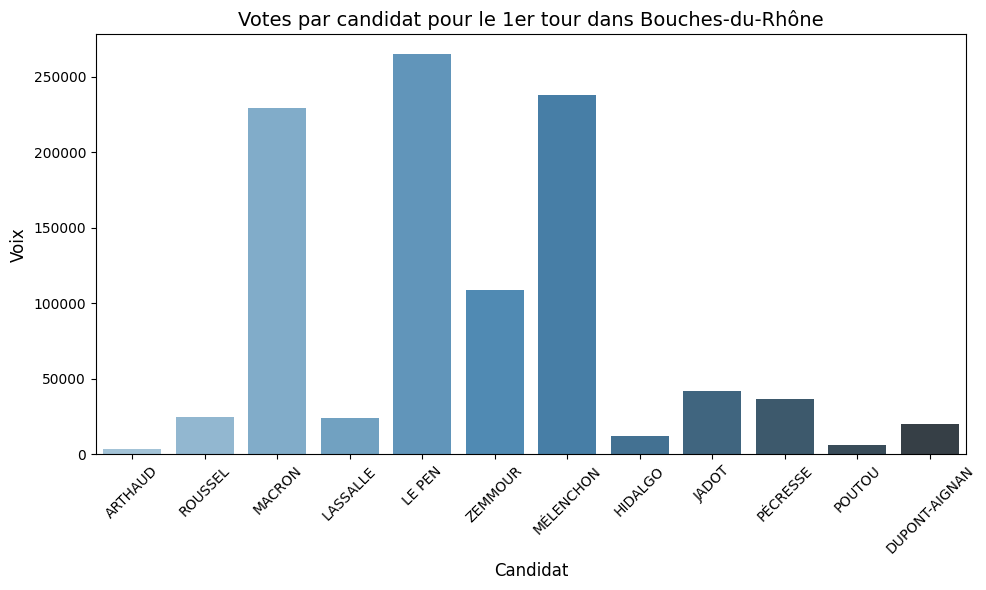

<ipython-input-68-07f816f6009f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")


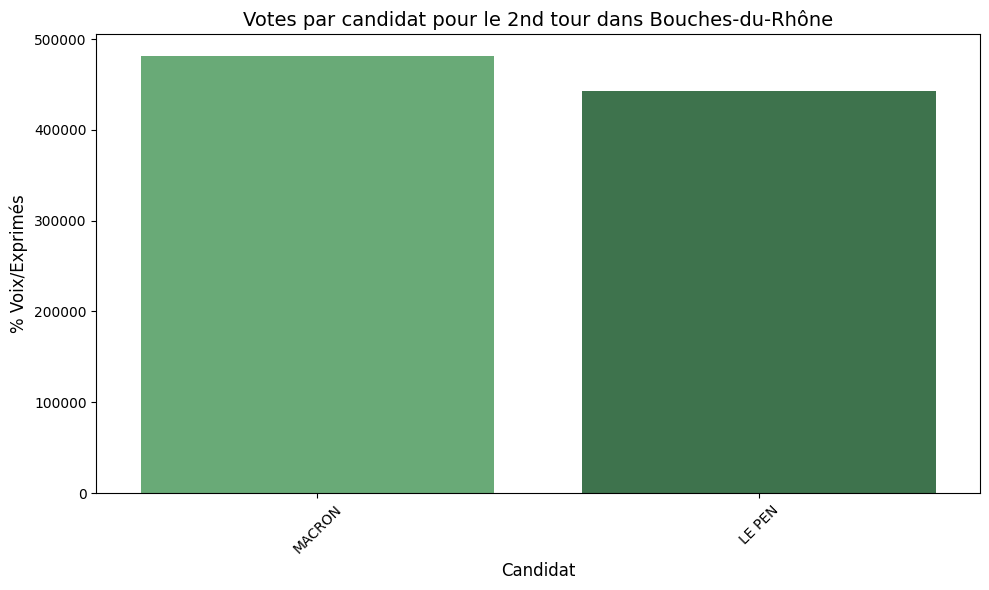

<ipython-input-68-07f816f6009f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")


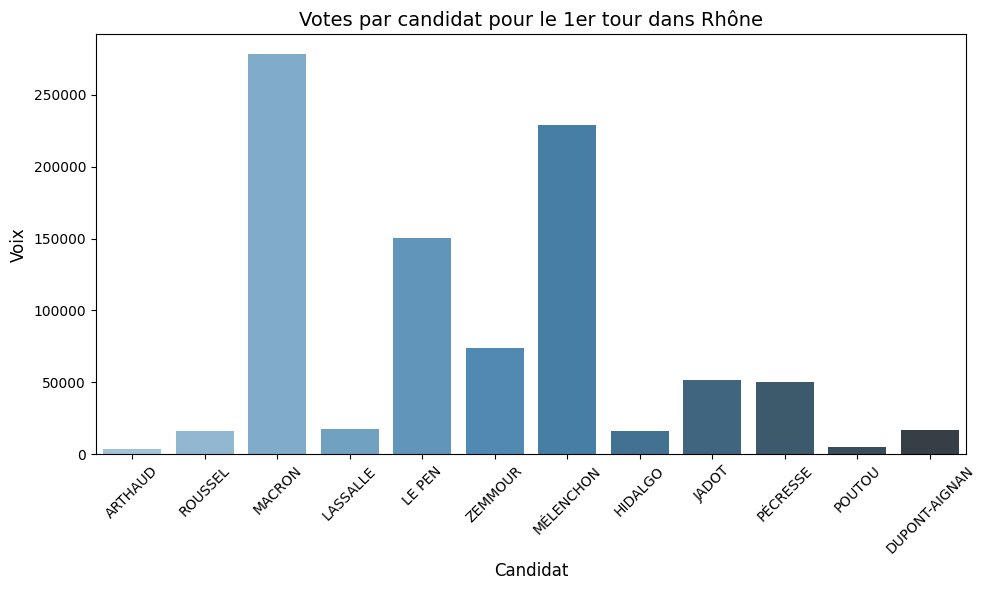

<ipython-input-68-07f816f6009f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")


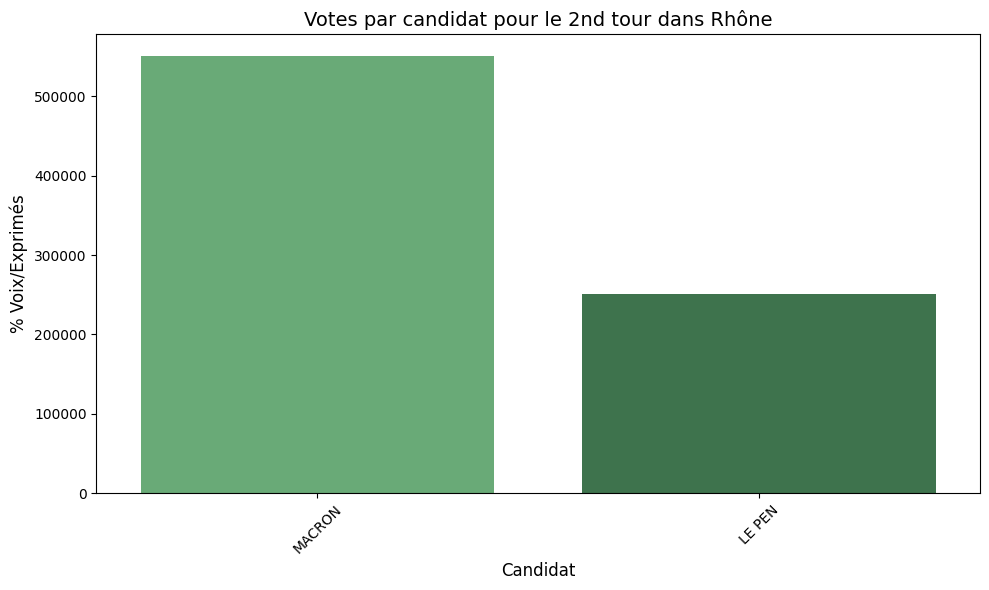

<ipython-input-68-07f816f6009f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")


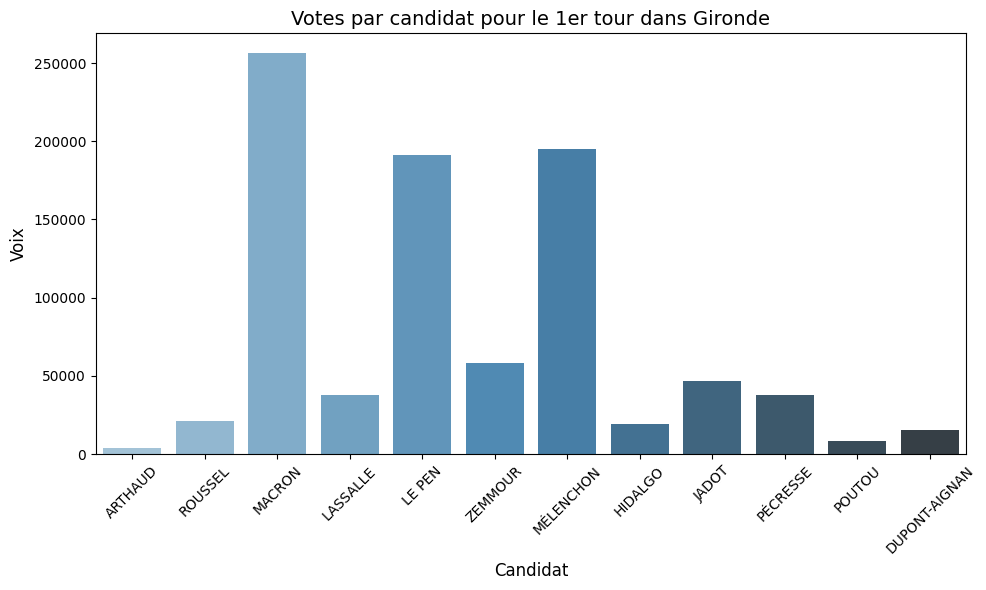

<ipython-input-68-07f816f6009f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")


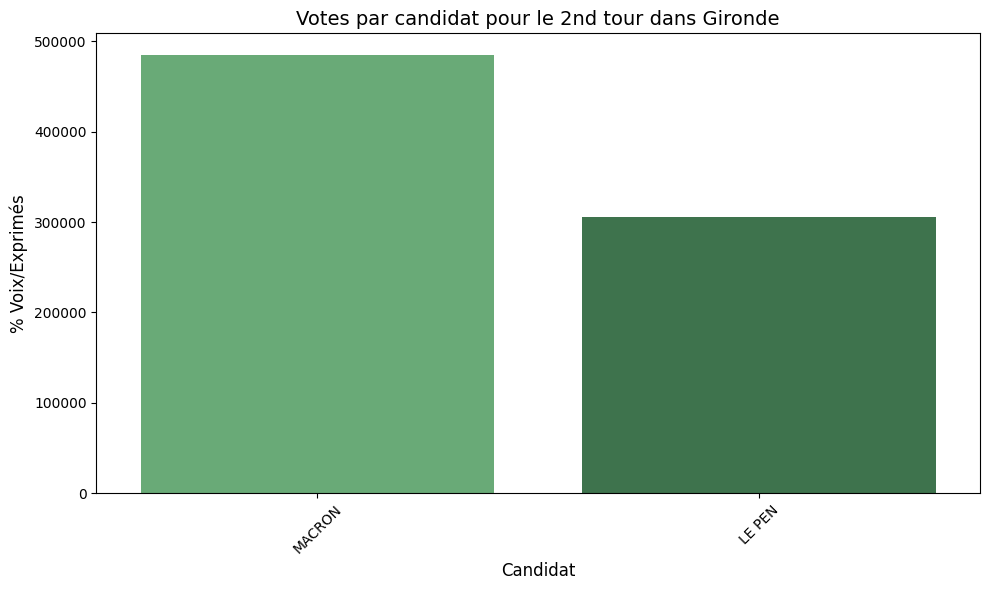

In [ ]:
# Sélectionner les départements avec le plus grand nombre de votes exprimés
top_departments_t1 = df_t1_grouped.head(5)["Libellé du département"]
top_departments_t2 = df_t2_grouped.head(5)["Libellé du département"]

# Fonction pour analyser les candidats par département
def analyser_candidats_departements(df_t1, df_t2, top_departments_t1, num_candidats_t1, num_candidats_t2):
    for department in top_departments_t1:
        # Extraire les données pour le département spécifique pour le 1er tour
        department_data_t1 = df_t1[df_t1["Libellé du département"] == department]
        department_data_t2 = df_t2[df_t2["Libellé du département"] == department]

        # Sélectionner les colonnes des candidats pour le 1er et 2nd tour
        candidats_t1 = [f"C{i+1}.Voix" for i in range(num_candidats_t1)]  # 12 candidats pour le 1er tour
        candidats_t2 = [f"C{i+1}.Voix" for i in range(num_candidats_t2)]  # 2 candidats pour le 2nd tour

        # Extraire les noms des candidats pour le 1er et 2nd tour (à partir de la 2ème ligne)
        noms_t1 = [f"C{i+1}.Nom" for i in range(num_candidats_t1)]  # 12 candidats pour le 1er tour
        noms_t2 = [f"C{i+1}.Nom" for i in range(num_candidats_t2)]  # 2 candidats pour le 2nd tour

        # Extraire les noms des candidats pour le 1er tour (ligne 2)
        candidates_names_t1 = department_data_t1[noms_t1].iloc[0].values

        # Extraire les noms des candidats pour le 2nd tour (ligne 2)
        candidates_names_t2 = department_data_t2[noms_t2].iloc[0].values

        # Réorganiser les données pour correspondre à la forme souhaitée pour les graphiques
        # 1er tour
        df_t1_plot = department_data_t1[candidats_t1].melt(var_name="Candidat", value_name="Voix")
        df_t1_plot["Département"] = department
        df_t1_plot["Nom_Candidat"] = [candidates_names_t1[i] for i in range(len(candidates_names_t1))]

        # 2nd tour
        df_t2_plot = department_data_t2[candidats_t2].melt(var_name="Candidat", value_name="Voix")
        df_t2_plot["Département"] = department
        df_t2_plot["Nom_Candidat"] = [candidates_names_t2[i] for i in range(len(candidates_names_t2))]

        # Graphique pour le premier tour
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_t1_plot, x="Nom_Candidat", y="Voix", palette="Blues_d")
        plt.title(f"Votes par candidat pour le 1er tour dans {department}", fontsize=14)
        plt.xlabel("Candidat", fontsize=12)
        plt.ylabel("Voix", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Graphique pour le second tour
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_t2_plot, x="Nom_Candidat", y="Voix", palette="Greens_d")
        plt.title(f"Votes par candidat pour le 2nd tour dans {department}", fontsize=14)
        plt.xlabel("Candidat", fontsize=12)
        plt.ylabel("% Voix/Exprimés", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Appliquer l'analyse pour les départements principaux
analyser_candidats_departements(df_t1, df_t2, top_departments_t1, num_candidats_t1=12, num_candidats_t2=2)


Le département choisi c'est le Nord

**Justification du choix du département du Nord pour l'analyse électorale**

Dans le cadre de cette analyse, le choix du département du Nord comme zone géographique d'étude repose sur une observation clé des résultats électoraux. Lors du premier tour, le département du Nord a enregistré un pourcentage élevé de voix pour Marine Le Pen, suivie d'Emmanuel Macron, puis de Jean-Luc Mélenchon. Cependant, au second tour, les résultats ont montré une inversion inattendue avec Emmanuel Macron obtenant la majorité des voix, suivi de Marine Le Pen. Ce phénomène contraste avec les tendances observées dans la majorité des autres départements du top 5 en termes de votes valides, où les positions de Macron et Le Pen restent relativement constantes entre les deux tours.

Ce renversement des résultats au second tour dans le département du Nord est unique parmi les autres départements, où les candidats Macron et Le Pen dominent souvent de manière similaire dans les deux tours. Bien qu'un autre département ait montré des résultats similaires, celui-ci a moins de votes valides que le département du Nord, ce qui rend ce dernier particulièrement pertinent pour notre analyse.

L'importance de ce département dans cette étude réside dans sa capacité à refléter des dynamiques électorales différentes, avec un changement notable entre les deux tours, ce qui en fait une zone d'intérêt pour comprendre les variations de comportement électoral. Par conséquent, le département du Nord a été choisi pour son caractère représentatif des tendances électorales complexes et pour son rôle significatif parmi les départements ayant un grand nombre de votes valides.
